9 Probabilités et statistiques


Dans un premier temps la statistique de la proportion de nombres commençant par un certain chiffre sera étudiée. Puis dans un second des modèles probabilistes seront introduits et simulés.

**Concepts abordés:**

* statistiques et probabilités

* loi de Benford

* série harmonique aléatoire

* marche aléatoire

* histogrammes

* importation de données

* optimisation par compilation

* percolation

* transition de phase

1. Série harmonique de signe aléatoire

Le but de cette partie est de simuler la convergence d'une série harmonique donc le signe est tiré aléatoirement. Plus précisément si $(X_i)_{i\in\mathbb{N}}$ est une suite de variables aléatoires indépendantes valant $-1$ ou $1$ avec probabilité $\frac{1}{2}$, alors on définit la somme partielle:
$$
W_0 = 0 \,, \qquad\qquad W_n = \sum_{i=1}^n \frac{X_i}{i} \,,
$$
et la question est de déterminer si la suite $(W_n)_{n\in\mathbb{N}}$ converge et si oui vers quoi.

a)
Écrivons une fonction `sign()` qui simule la variable aléatoire $X_i$.

In [7]:
import numpy as np

def sign():
    return np.random.choice([-1, 1])

b)
Écrire une fonction `simulate(n)` qui retourne une liste avec une réalisation de $(W_1,W_2,\dots,W_n)$.

In [8]:
def simulate(n):
    realisation=[0]
    for i in range(1,n+1):
        realisation.append(realisation[i-1]+sign()/i)
    return realisation[1:]

c) Il semble que la v.a. converge pour toute réalisation comme le montre les courbes suivantes:

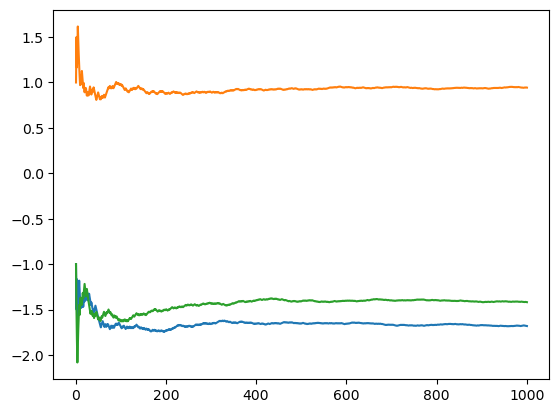

In [9]:
import matplotlib.pyplot as plt

N=1000
x= [i for i in range(1, N+1)]
y1= simulate(N)
y2= simulate(N)
y3= simulate(N)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

d)
Visualisons l'histogramme de $W_{1 000}$ pour $10^4$ ou $10^5$ réalisations pour avoir une idée de la loi de la variable aléatoire limite. Je me suis limité à $W_{200}$ pour des raisons de performance, et car selon les courbes ci-dessus, il me semble que c'est suffisant pour avoir une assez bonne idée de la limite de $W_n$

(array([1.000e+00, 0.000e+00, 3.000e+00, 7.000e+00, 1.300e+01, 1.300e+01,
        2.300e+01, 2.800e+01, 4.300e+01, 7.700e+01, 8.900e+01, 1.340e+02,
        1.530e+02, 2.050e+02, 2.530e+02, 2.880e+02, 3.880e+02, 4.970e+02,
        5.790e+02, 6.120e+02, 7.160e+02, 8.160e+02, 9.500e+02, 1.020e+03,
        1.084e+03, 1.203e+03, 1.206e+03, 1.272e+03, 1.325e+03, 1.515e+03,
        1.585e+03, 1.628e+03, 1.605e+03, 1.655e+03, 1.738e+03, 1.812e+03,
        1.800e+03, 1.814e+03, 1.879e+03, 1.761e+03, 1.856e+03, 1.832e+03,
        1.809e+03, 1.786e+03, 1.876e+03, 1.925e+03, 1.934e+03, 1.781e+03,
        1.863e+03, 1.801e+03, 1.865e+03, 1.816e+03, 1.821e+03, 1.899e+03,
        1.868e+03, 1.846e+03, 1.894e+03, 1.835e+03, 1.814e+03, 1.877e+03,
        1.786e+03, 1.859e+03, 1.812e+03, 1.734e+03, 1.699e+03, 1.676e+03,
        1.694e+03, 1.654e+03, 1.576e+03, 1.474e+03, 1.458e+03, 1.435e+03,
        1.316e+03, 1.246e+03, 1.136e+03, 1.054e+03, 9.440e+02, 8.710e+02,
        7.770e+02, 7.060e+02, 6.400e+0

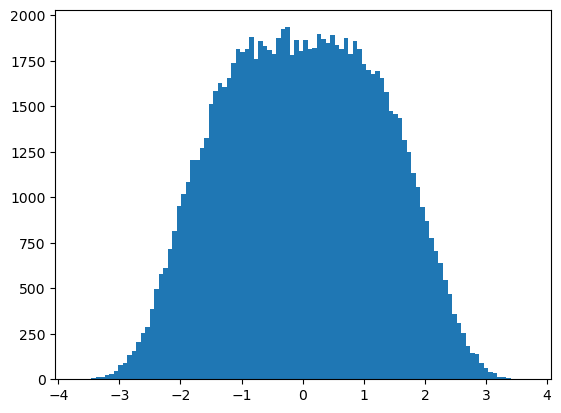

In [21]:
N=10**5

y=[simulate(200)[199] for i in range(1,N+1)]
plt.hist(y, bins=100)

L'histogramme fait penser à une courbe de Gauss, avec un chapeau tronqué... Mais d'après le theoreme central limite, comme les $\frac{X_i}{i}$ sont de variance finie, on pouvait s'y attendre.

2. Loi de Benford

La loi de Benford prédit que statistiquement dans une liste de nombres donnés, la probabilité qu'un de ces nombres commence par le chiffre 1 est plus importante que celle qu'un nombre commence par le chiffre 9. Plus précisément la loi de Benford prédit que la probabilité qu'un nombre commence par le chiffre $d$ est:
$$
p_d = \log_{10}\bigg(1+\frac{1}{d}\bigg) \,,
$$
où $\log_{10}$ désigne le logarithme en base 10.
Il est possible de vérifier que la loi de Benford est la seule qui reste invariante par changement d'unités, *i.e.* en multipliant les nombres de la liste par une constante les probabilités précédentes restent inchangées.


a)
Écrivons une fonction `firstdigit(n)` qui pour un nombre `n` donné retourne son premier chiffre et une fonction `occurrences(liste)` qui retourne le nombre d'occurrences des premiers chiffres de `liste`.

Note : 
On fait en sorte que la fonction `occurrences` fonctionne même si la liste contient des zéros en les ignorant.

In [10]:
def firstdigit(n):
    return int(str(n)[0])

def occurrences(liste):
    occ=[0 for i in range(1, 10)]
    for x in liste:
        if x!=0:
            occ[firstdigit(x)-1]+=1
    return occ

occurrences([0, 2, 4, 56, 77, 87, 9, 11, 12, 234, 0, 7])

[2, 2, 0, 1, 1, 0, 2, 1, 1]

b)
Vérifions si la loi de Benford semble satisfaite pour la suite des nombres $(2^n)_ {n\in\mathbb{N}}$ en comparant l'histogramme empirique avec la loi de Benford. On remarque que les deux courbes se superposent quasiment : (j'ai pris les 1000 premiers termes de la suite)

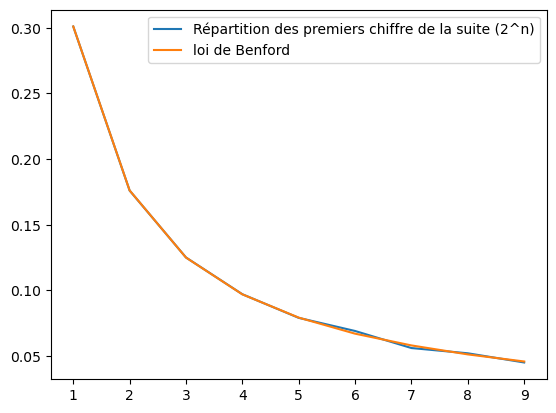

In [11]:
x=np.array([2**i for i in range(1000)])
y= np.array(occurrences(x))
axe=[i for i in range(1,10)]
plt.plot(axe, y/1000, label="Répartition des premiers chiffre de la suite (2^n)")
Benford=[np.log10(1+1/i) for i in range(1, 10)]
plt.plot(axe, Benford, label="loi de Benford")
plt.legend()

c) 
Cependant, la loi de Benford n'est pas vérifié pour toutes les suites : par exemple la loi de Benford semble satisfaite pour la suite des nombres $(3n+1)_ {n\in\mathbb{N}}$.

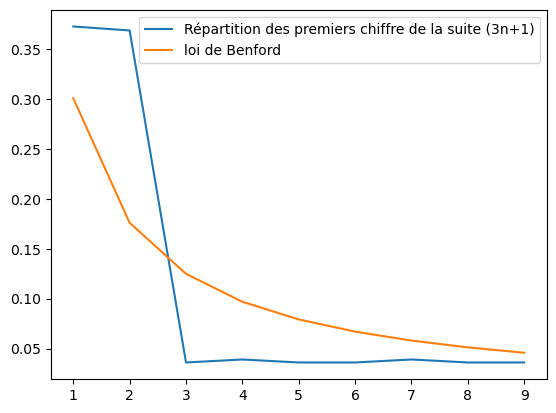

In [12]:
N=1000
x=np.array([3*i+1 for i in range(N)])
y= np.array(occurrences(x))
plt.plot(axe, y/N, label="Répartition des premiers chiffre de la suite (3n+1)")
Benford=[np.log10(1+1/i) for i in range(1, 10)]
plt.plot(axe, Benford, label="loi de Benford")
plt.legend()

d)
En allant sur le site de l'INSEE à l'adresse: <https://www.insee.fr/fr/statistiques/5395878>, j'ai téléchargé le fichier au format CSV contenant les données de la population par sexe et âge regroupé (POP1A). Importons ces données pour avoir la population par code postal, sexe et tranche d'âge. Je me suis aidé de cette documentation python : https://docs.python.org/fr/3/library/csv.html
J'ai supprimé les colonnes que je n'utiliserai pas directement dans le fichier pour ne pas avoir à les gérer sur python. Il n'y a donc que les colonnes code postal, sexe, tranche d'age et population dans insee.CSV 
Les données sont enregistrées dans le tableau TableauPop

In [13]:
import csv

TableauPop=[]
with open('insee.CSV', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        TableauPop.append([row['Code Postal'], row['Sexe'], row['Tranche d’age'], row['Population']])

csvfile.closed

True

e) Vérifions que la loi de Benford est vérifié sur ces données. J'ai fais une petite modification de la fonction occurences pour qu'elle fontionne sur une liste de chaine de caractère et non une liste d'entier.

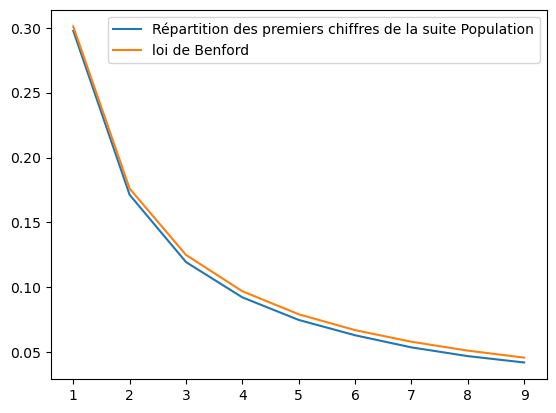

In [14]:
def occurrencesMod(liste):
    occ=[0 for i in range(1, 10)]
    for x in liste:
        if int(x[0])!=0:
            occ[int(x[0])-1]+=1
    return occ         

colonne=[]
for i in range(len(TableauPop)):
    colonne.append(TableauPop[i][3])
y=occurrencesMod(colonne)
N=len(colonne)
y= np.array(y)
plt.plot(axe, y/N, label="Répartition des premiers chiffres de la suite Population")
Benford=[np.log10(1+1/i) for i in range(1, 10)]
plt.plot(axe, Benford, label="loi de Benford")
plt.legend()


f) Sommons les données précédentes pour obtenir la liste des populations par commune et regardons si elle suit la loi de Benford. Encore une fois, la loi est très précise: 

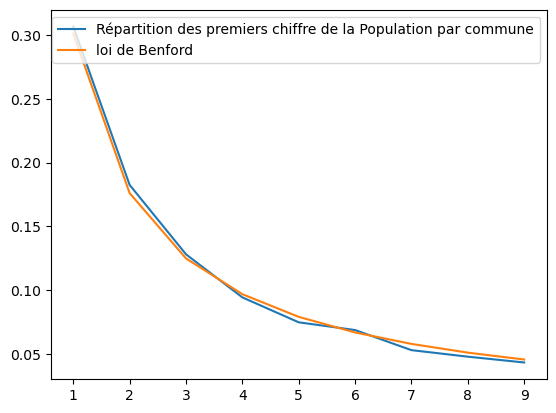

In [15]:
N=int(len(TableauPop)/20)

commune=[0 for i in range(N)]
for i in range(N):
    for j in range(1, 21):
        commune[i]+=float(TableauPop[j+i][3])
    commune[i]=str(commune[i])

y= np.array(occurrences(commune))
plt.plot(axe, y/N, label="Répartition des premiers chiffre de la Population par commune")
Benford=[np.log10(1+1/i) for i in range(1, 10)]
plt.plot(axe, Benford, label="loi de Benford")
plt.legend()

h) Je voudrais tester les données de la mortalité pendant une période covid (mars à juillet 2020) pour voir si elle suit la loi de Benford.
Je suis allée chercher ce document ici : https://www.insee.fr/fr/statistiques/4961438?sommaire=4487854 
Le fichier repertorie les décés par sexe âge et lieu.

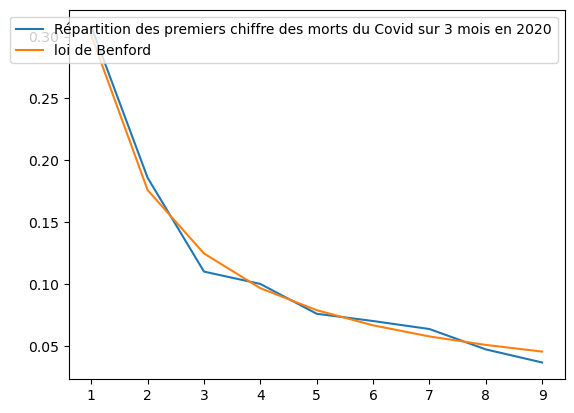

In [16]:
DecesJour=[]
with open('covid.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        DecesJour.append([row['Femmes_0_24ans'], row['Femmes_25_49ans'], row['Femmes_50_64ans'], row['Femmes_65_74ans'], row['Femmes_75_84ans'], row['Femmes_85ans_plus'], row['Hommes_0_24ans'], row['Hommes_25_49ans'], row['Hommes_50_64ans'], row['Hommes_65_74ans'], row['Hommes_75_84ans'], row['Hommes_85ans_plus']])

csvfile.closed

S=np.size(DecesJour)
DecesJour= np.array(DecesJour)
DecesJour.shape = (1, S)
y=np.array(occurrences(DecesJour[0]))
plt.plot(axe, y/S, label="Répartition des premiers chiffre des morts du Covid sur 3 mois en 2020")
Benford=[np.log10(1+1/i) for i in range(1, 10)]
plt.plot(axe, Benford, label="loi de Benford")
plt.legend()

Encore une fois, ça marche assez bien.

3. Ruine du joueur

   Le but est de simuler l'évolution de la somme d'argent d'un joueur jouant à pile ou face. À chaque lancer le joueur gagne un euro si c'est pile et en perd un si c'est face. La probabilité d'obtenir pile est notée $p$, celle d'obtenir face $q$. En particulier $p=q=\frac{1}{2}$ si la pièce est équilibrée.

Mathématiquement, la somme $S_i$ possédée par le joueur au temps $i$ est donnée par une marche aléatoire:
$$
S_{i}=\begin{cases}
0\,, & \text{si}\:S_{i-1}=0\,,\\ 
S_{i-1}+X_{i}\,, & \text{si}\:S_{i-1}\geq1\,,
\end{cases}
$$
où les $(X_i)_ {i\geq1}$ sont des variables aléatoires indépendantes de loi $\mathbb{P}(X_i=1) = p$ et $\mathbb{P}(X_i=-1) = q$.

a)
Écrivons une fonction `simulate(p,k,N)` qui génère une réalisation de longueur $N$ du processus à partir de $S_0=k$, c'est-à-dire qui retourne $(S_0,S_1,S_2,\dots,S_N)$.

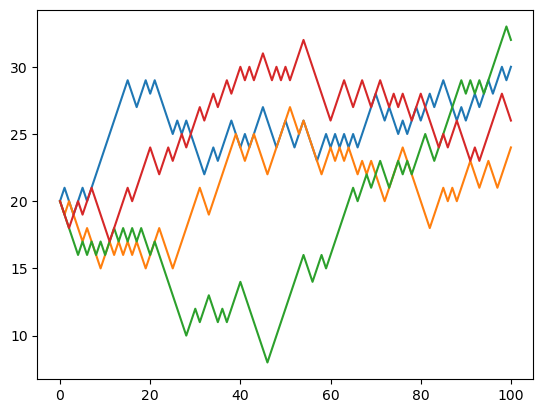

In [17]:
def simulate(p, k, N):
    real=[k]+list(np.random.choice([-1, 1], size=N, replace=True, p=[1-p, p]))
    for i in range(1, N+1):
        real[i]+= real[i-1]
    return real
    
real1 = simulate(0.5, 20, 100)
real2 = simulate(0.5, 20, 100)
real3 = simulate(0.5, 20, 100)
real4 = simulate(0.5, 20, 100)

axe=[i for i in range(101)]

plt.plot(axe, real1)
plt.plot(axe, real2)
plt.plot(axe, real3)
plt.plot(axe, real4)

b)
Ensuite, on va faire la même chose avec un joueur qui, commençant avec une somme $k$, joue jusqu'à tout perdre ou avoir la somme $n \geq k$. Je vais réécrire la fonction précédente mais sans argument de taille, et en ajoutant un argument de capital auquel le joueur s'arrête: k est la mise de départ et n l'objectif de capital.

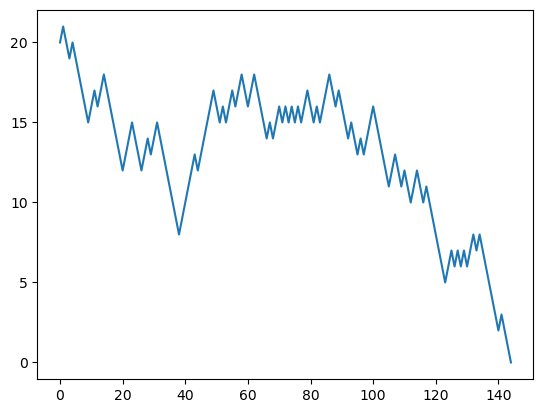

In [19]:
def simulateArret(p, n, k):
    real=[k]
    i=0
    while real[i]!=0 and real[i]!=n:
        real.append(real[i]+np.random.choice([-1, 1], replace=True, p=[1-p, p]))
        i+=1
    return real

z=simulateArret(0.5, 40, 20)
x=[i for i in range(len(z))]
plt.plot(x, z)

L'algorithme termine presque surement car la marche aléatoire symétrique sur Z est transiente.

c) Si $T$ désigne le temps auquel le jeu s'arrête, *i.e.* lorsque $S_T = 0$ ou $S_T = n$, on va vérifier par simulation les résultats théoriques sur le temps moyen: 
$$
\mathbb{E}(T)=\begin{cases}
k(n-k)\,, & \text{si}\:p=q\,,\\ 
\dfrac{n}{p-q}\dfrac{1-\rho^{k}}{1-\rho^{n}}-\dfrac{k}{p-q}\,, & \text{si}\:p\neq q\,,
\end{cases}
$$
et le lieu de sortie:
$$
\mathbb{P}(S_{T}=0)=\begin{cases}
\dfrac{n-k}{n}\,, & \text{si}\:p=q\,,\\ 
\dfrac{\rho^{k}-\rho^{n}}{1-\rho^{n}}\,, & \text{si}\:p\neq q\,,
\end{cases}
$$
où $\rho = q/p$.

On commence pas le temps d'arrêt et le cas p=q=1/2:


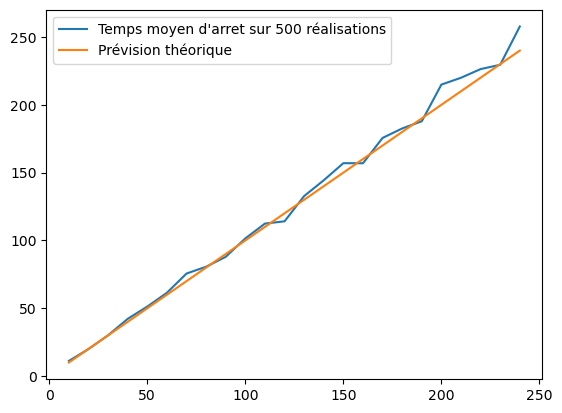

In [21]:
T=[np.mean([len(simulateArret(0.5, i, 10)) for j in range(500)]) for i in range(11, 35)]
x=[10*(i-10) for i in range(11, 35)]
plt.plot(x, T, label="Temps moyen d'arret sur 500 réalisations")
plt.plot(x, x, label="Prévision théorique")
plt.legend()

Le lieu de sortie et le cas p=q=1/2:

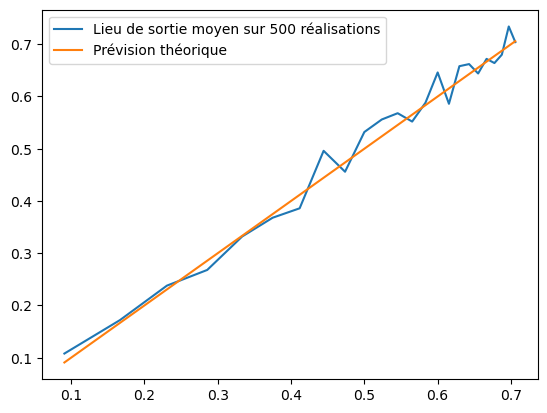

In [22]:
S=[1-np.sum([simulateArret(0.5, i, 10)[-1] for j in range(500)])/(500*i) for i in range(11, 35)]
x=[(i-10)/i for i in range(11, 35)]
plt.plot(x, S, label="Lieu de sortie moyen sur 500 réalisations")
plt.plot(x, x, label="Prévision théorique")
plt.legend()

4. Percolation

Le but de cette partie d'étudier un modèle de percolation dans un milieu poreux. Le milieu est modélisé par une matrice aléatoire de booléens qui détermine les sites qui peuvent être envahis par l'eau et ceux qui sont imperméables. Une matrice percole s'il existe un chemin d'eau allant de la ligne supérieure vers la ligne inférieure. Dans les exemples suivants, les entrées d'une matrice pouvant être envahies par l'eau sont colorées et les entrées effectivement remplies d'eau sont en bleu. La première matrice ne percole pas alors que la seconde oui:

<center><img src="https://python.guillod.org/fig/percolation-def.png" style="width:90%;max-width:800px;"></center>

a)
Commençons par écrire une fonction `generate(n,p)` qui génère une matrice de booléens de taille $n \times n$ telle que chaque entrée ait probabilité $p$ d'être juste et $1-p$ d'être fausse.

Note : ici la fonction `numpy.random.choice` est très utile.

In [24]:
def generate(n,p):
    ligne=np.matrix(np.random.choice([False, True], n**2, [1-p, p]))
    return ligne.reshape([n,n])
A=generate(10, 0.5)
print(A)

[[False False  True  True  True False False  True  True  True]
 [ True  True  True False  True  True False  True False  True]
 [False  True False False  True  True False  True False False]
 [False False  True  True  True  True  True  True  True False]
 [False  True  True False  True  True  True  True  True False]
 [ True False  True  True False  True  True False False False]
 [ True False False  True False  True False False False False]
 [False False False False  True False  True False False  True]
 [ True  True  True False  True  True False False  True False]
 [False  True  True  True False False  True  True False  True]]


b)
Définisson une fonction `fill(isopen)` qui pour une matrice de booléens donnée renvoie une autre matrice de booléens avec les entrées envahies par l'eau. Tous les cas aux extrémités doivent être couverts:

In [45]:
def flow_vanilla(isopen, isfull, i, j):
    n=len(isopen)
    isfull[i, j]=True
    if (i, j)==(0,0):
        if isopen[i+1, j] and not(isfull[i+1, j]):
            flow(isopen, isfull, i+1, j)
        if isopen[i, j+1] and not(isfull[i, j+1]):
            flow(isopen, isfull, i, j+1)
    if (i,j)==(0,n-1):
        if isopen[i+1, j] and not(isfull[i+1, j]):
            flow(isopen, isfull, i+1, j)
        if isopen[i, j-1] and not(isfull[i, j-1]):
            flow(isopen, isfull, i, j-1)
    if (i, j)==(n-1, n-1):
        if isopen[i-1, j] and not(isfull[i-1, j]):
            flow(isopen, isfull, i-1, j)
        if isopen[i, j-1] and not(isfull[i, j-1]):
            flow(isopen, isfull, i, j-1)
    if (i, j)==(n-1, 0):
        if isopen[i-1, j] and not(isfull[i-1, j]):
            flow(isopen, isfull, i-1, j)
        if isopen[i, j+1] and not(isfull[i, j+1]):
            flow(isopen, isfull, i, j+1)
    if i==0 and j!=0 and j!= n-1:
        if isopen[i+1, j] and not(isfull[i+1, j]):
            flow(isopen, isfull, i+1, j)
        if isopen[i,j+1] and not(isfull[i, j+1]):
            flow(isopen, isfull, i, j+1)
        if isopen[i, j-1] and not(isfull[i, j-1]):
            flow(isopen, isfull, i, j-1)
    if i==n-1 and j!=0 and j!=n-1:
        if isopen[i-1, j] and not(isfull[i-1, j]):
            flow(isopen, isfull, i-1, j)
        if isopen[i,j+1] and not(isfull[i, j+1]):
            flow(isopen, isfull, i, j+1)
        if isopen[i, j-1] and not(isfull[i, j-1]):
            flow(isopen, isfull, i, j-1)
    if j==0 and i!=0 and i!=n-1:
        if isopen[i-1, j] and not(isfull[i-1, j]):
            flow(isopen, isfull, i-1, j)
        if isopen[i,j+1] and not(isfull[i, j+1]):
            flow(isopen, isfull, i, j+1)
        if isopen[i+1, j] and not(isfull[i+1, j]):
            flow(isopen, isfull, i+1, j)
    if j==n-1 and i!=0 and i!=n-1:
        if isopen[i-1, j] and not(isfull[i-1, j]):
            flow(isopen, isfull, i-1, j)
        if isopen[i,j-1] and not(isfull[i, j-1]):
            flow(isopen, isfull, i, j-1)
        if isopen[i+1, j] and not(isfull[i+1, j]):
            flow(isopen, isfull, i+1, j)
    if i!=0 and i!=n-1 and j!=0 and j!= n-1:
        if isopen[i-1, j] and not(isfull[i-1, j]):
            flow(isopen, isfull, i-1, j)
        if isopen[i,j-1] and not(isfull[i, j-1]):
            flow(isopen, isfull, i, j-1)
        if isopen[i+1, j] and not(isfull[i+1, j]):
            flow(isopen, isfull, i+1, j)
        if isopen[i, j+1] and not(isfull[i, j+1]):
            flow(isopen, isfull, i, j+1)
    return isfull

def fill(isopen):
    n=len(isopen)
    isfull=np.matrix([[False for _ in range(n)] for _ in range(n)])
    for k in range(len(isopen)):
        if isopen[0, k]:
            flow_vanilla(isopen, isfull, 0, k)
    return isfull

print(fill(A))

[[False False False False  True False False  True False False]
 [False False False False  True False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


En comparant A avec fill(A), on constate que ça marche.

c) Mais si on pouvait le representer graphiquement, ce serait mieux.
À l'aide de Matplotlib on représente le remplissage de différentes matrices générées aléatoirement.

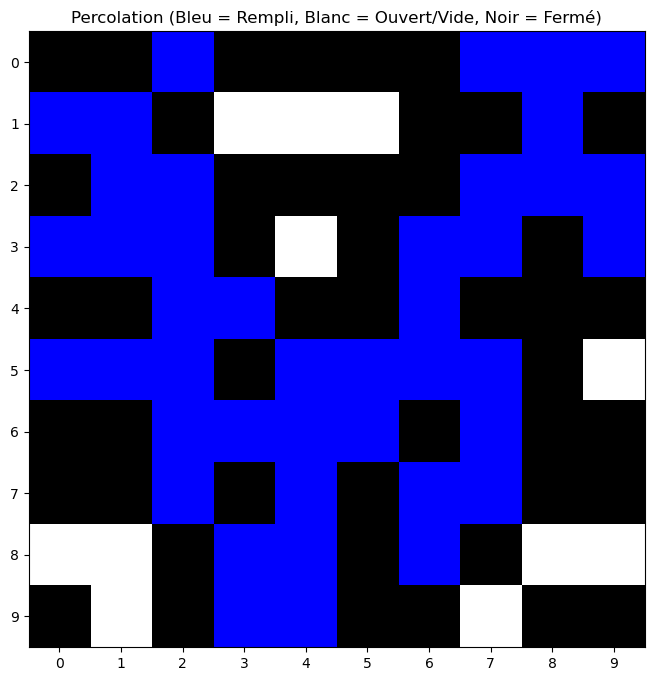

In [46]:
from matplotlib.colors import ListedColormap
N=10
A=generate(N, 0.5)
isfull = fill(A)
M_visu = np.zeros((N, N), dtype=int)
M_visu[A == True] = 1
M_visu[isfull == True] = 2


colors = ['black', 'white', 'blue']
cmap_custom = ListedColormap(colors)

fig, ax = plt.subplots(figsize=(8, 8))

im = ax.imshow(M_visu, cmap=cmap_custom, vmin=0, vmax=2)

ax.set_xticks(np.arange(0, N, 1))
ax.set_yticks(np.arange(0, N, 1))
ax.tick_params(top=False, bottom=True, labeltop=False, labelbottom=True)

plt.title("Percolation (Bleu = Rempli, Blanc = Ouvert/Vide, Noir = Fermé)")
plt.grid(False) 
plt.show()

d)
Définissons maintenant une fonction `percolate(isopen)` permettant de déterminer si une matrice de booléens percole ou non.

In [47]:
def percolates(isopen):
    n = isopen.shape[0]
    isfull = fill(isopen)
    return np.any(isfull[n - 1, :])

e)
Calculons le temps nécessaire pour déterminer si une matrice de taille $50 \times 50$ avec $p=0.9$ percole ou non. La documentation du module `numba` pour réduire le temps de calcul en compilant une des fonctions: <https://numba.pydata.org/>. est utile

Note : 
La fonction qui est la plus utilisée est la fonction récursive, donc c'est celle qu'il faut optimiser en la compilant.

In [71]:
from numba import njit

@njit
def flow_numba(isopen, isfull, i, j):
    n = isopen.shape[0]
    if not (0 <= i < n and 0 <= j < n) or isfull[i, j] or not isopen[i, j]:
        return
    isfull[i, j] = True
    for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        ni, nj = i + di, j + dj
        flow_numba(isopen, isfull, ni, nj)

Maintenant, on réécris la fonction de remplissage selon numba en la compilant ainsi que les autres fonctions selon la méthode classique:

In [85]:
@njit
def percolates_numba(isopen):
    """Détermine la percolation (compilée)."""
    n = isopen.shape[0]
    # Appelle la fonction fill compilée
    isfull = fill_numba(isopen)
    
    # np.any est bien supporté par njit
    return np.any(isfull[n - 1, :])


def flow_vanilla(isopen, isfull, i, j): # Redéfinie pour le test vanilla
    n = isopen.shape[0]
    if not (0 <= i < n and 0 <= j < n) or isfull[i, j] or not isopen[i, j]:
        return
    isfull[i, j] = True
    for di, dj in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        ni, nj = i + di, j + dj
        flow_vanilla(isopen, isfull, ni, nj)

def percolates_executor_vanilla(isopen):
    n = isopen.shape[0]
    isfull = np.full((n, n), False, dtype=np.bool_) 
    for j in range(n):
        if isopen[0, j]:
            flow_vanilla(isopen, isfull, 0, j)
    return np.any(isfull[n - 1, :])


Maintenant, on peut tester les calculs : 

In [86]:
import sys
import time
sys.setrecursionlimit(3000)


N_size = 50
P_prob = 0.9
N_runs = 1000

print(f"--- Test de Performance (Taille {N_size}x{N_size}, p={P_prob}) ---")
start_vanilla = time.time()
for _ in range(N_runs):
    result_vanilla = percolates_executor_vanilla(A_test) 
end_vanilla = time.time()
time_vanilla = (end_vanilla - start_vanilla) / N_runs

percolates_numba(A_test)

start_numba = time.time()
for _ in range(N_runs):
    result_numba = percolates_numba(A_test) 
end_numba = time.time()
time_numba = (end_numba - start_numba) / N_runs

speedup = time_vanilla / time_numba if time_numba > 0 else 0

print(f"Temps moyen Vanilla (Pure Python): {time_vanilla:.6f} secondes")
print(f"Temps moyen Numba (JIT Compilé): {time_numba:.6f} secondes")
print("-" * 35)
print(f"Accélération (Speedup): x{speedup:.2f}")

--- Test de Performance (Taille 50x50, p=0.9) ---
Temps moyen Vanilla (Pure Python): 0.000513 secondes
Temps moyen Numba (JIT Compilé): 0.000011 secondes
-----------------------------------
Accélération (Speedup): x47.09


f)
En faisant des statistiques, on va maintenant déterminer la probabilité qu'une matrice aléatoire booléenne de taille $n \times n$ avec probabilité $p$ percole. Étudions cette probabilité en fonction de $p$ et de $n$.

Note 1: 
Je fait le graphique de cette probabilité de percolation en fonction de $p$ pour différentes valeurs de $n$.

Note 2:
Dans la limite des $n$ très grands, une matrice percole presque sûrement si $p>0.592746$ et presque jamais sinon.

Début des simulations...
  Simulation pour n = 20...
  Simulation pour n = 50...
  Simulation pour n = 100...
Simulations terminées.


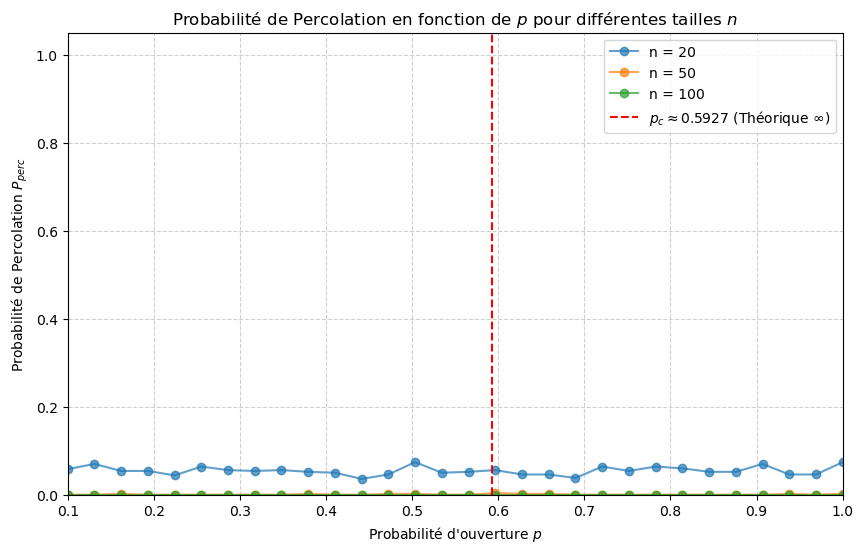


Observation:
Les courbes deviennent plus abruptes à mesure que n augmente, convergeant vers la valeur critique théorique p_c ≈ 0.592746 (le seuil de percolation pour un réseau infini).


In [89]:
def percolation_probability(n, p, N_simu):
    percolates_func = percolates_numba    
    successes = 0
    for _ in range(N_simu):
        A = generate(n, p)
        if percolates_func(A):
            successes += 1
    return successes / N_simu



N_simulations = 500 
N_values = [20, 50, 100]
P_values = np.linspace(0.1, 1.0, 30)

results = {}

print("Début des simulations...")
for n in N_values:
    print(f"  Simulation pour n = {n}...")
    probabilities = []
    for p in P_values:
        P_perc = percolation_probability(n, p, N_simulations)
        probabilities.append(P_perc)
    
    results[n] = probabilities

print("Simulations terminées.")

plt.figure(figsize=(10, 6))

for n, P_perc_values in results.items():
    plt.plot(P_values, P_perc_values, marker='o', linestyle='-', label=f'n = {n}', alpha=0.7)

P_critique_theorique = 0.592746
plt.axvline(x=P_critique_theorique, color='r', linestyle='--', label=f'$p_c \\approx 0.5927$ (Théorique $\\infty$)' )

plt.title('Probabilité de Percolation en fonction de $p$ pour différentes tailles $n$')
plt.xlabel('Probabilité d\'ouverture $p$')
plt.ylabel('Probabilité de Percolation $P_{perc}$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.ylim(0, 1.05)
plt.xlim(0.1, 1.0)
plt.show()

print(f"\nObservation:\nLes courbes deviennent plus abruptes à mesure que n augmente, convergeant vers la valeur critique théorique p_c ≈ {P_critique_theorique} (le seuil de percolation pour un réseau infini).")